## FacetGrid

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating housing raw dataframe
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [3]:
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [4]:
#example of linspace used below
np.linspace(0, 1750000, 8)

array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
       1500000., 1750000.])

#### Bining data

In [5]:
#creating a range of bins using linspace
bins = np.linspace(0, 1750000, 8) # bins starting at 0 and ending at 1750000, 8 of them
#creating labels for the bins
labels = ['0-250k', '250k-500k','500k-750k','750k-1m','1m-1.25m','1.25m-1.5m','1.5m+']

In [15]:
ca_housing = (housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11], 
       price_bins = pd.cut(housing_raw["median_active_list_price"],
                                 bins=bins,
                                 labels=labels
                          )))
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,250k-500k
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607,500k-750k
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632,250k-500k
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228,250k-500k
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362,250k-500k


In [16]:
# to filter in only certain counties
county_list = ["Los Angeles", "San Diego", "San Francisco", "Tulare"]

ca4 = ca_housing.loc[ca_housing['region_name'].isin(county_list)]

ca4.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
883,Tulare,2019-07-08,2019-09-29,998,94.0,101.0,51.5,275036.4,1.247401,250k-500k
889,Los Angeles,2018-08-20,2018-11-11,16015,20026.0,21675.0,51.9,694662.5,16.528985,500k-750k
2365,Tulare,2022-02-14,2022-05-08,1029,320.0,367.0,28.7,382726.4,4.220507,250k-500k
3773,Los Angeles,2017-12-25,2018-03-18,13596,13817.0,15251.0,51.3,664516.6,13.834214,500k-750k
3802,Tulare,2021-10-11,2022-01-02,952,83.0,90.0,50.5,358812.5,1.160690,250k-500k


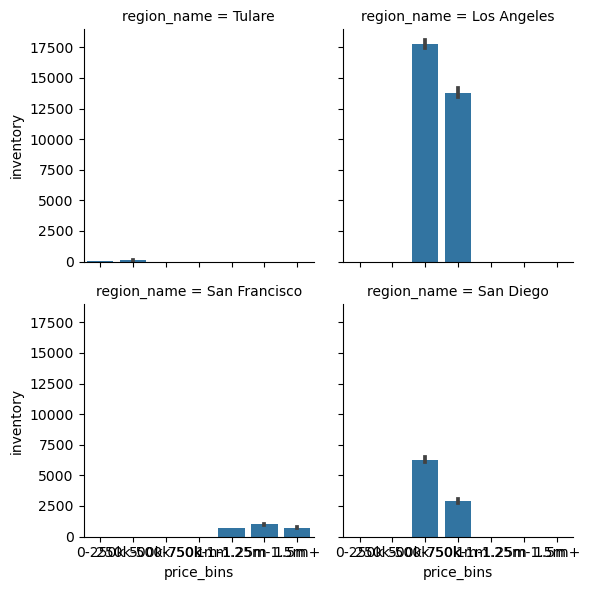

In [17]:
g =sns.FacetGrid(ca4,
                col="region_name",
                col_wrap=2,
#                 height=6
                )

g.map_dataframe(sns.barplot, x="price_bins", y="inventory")

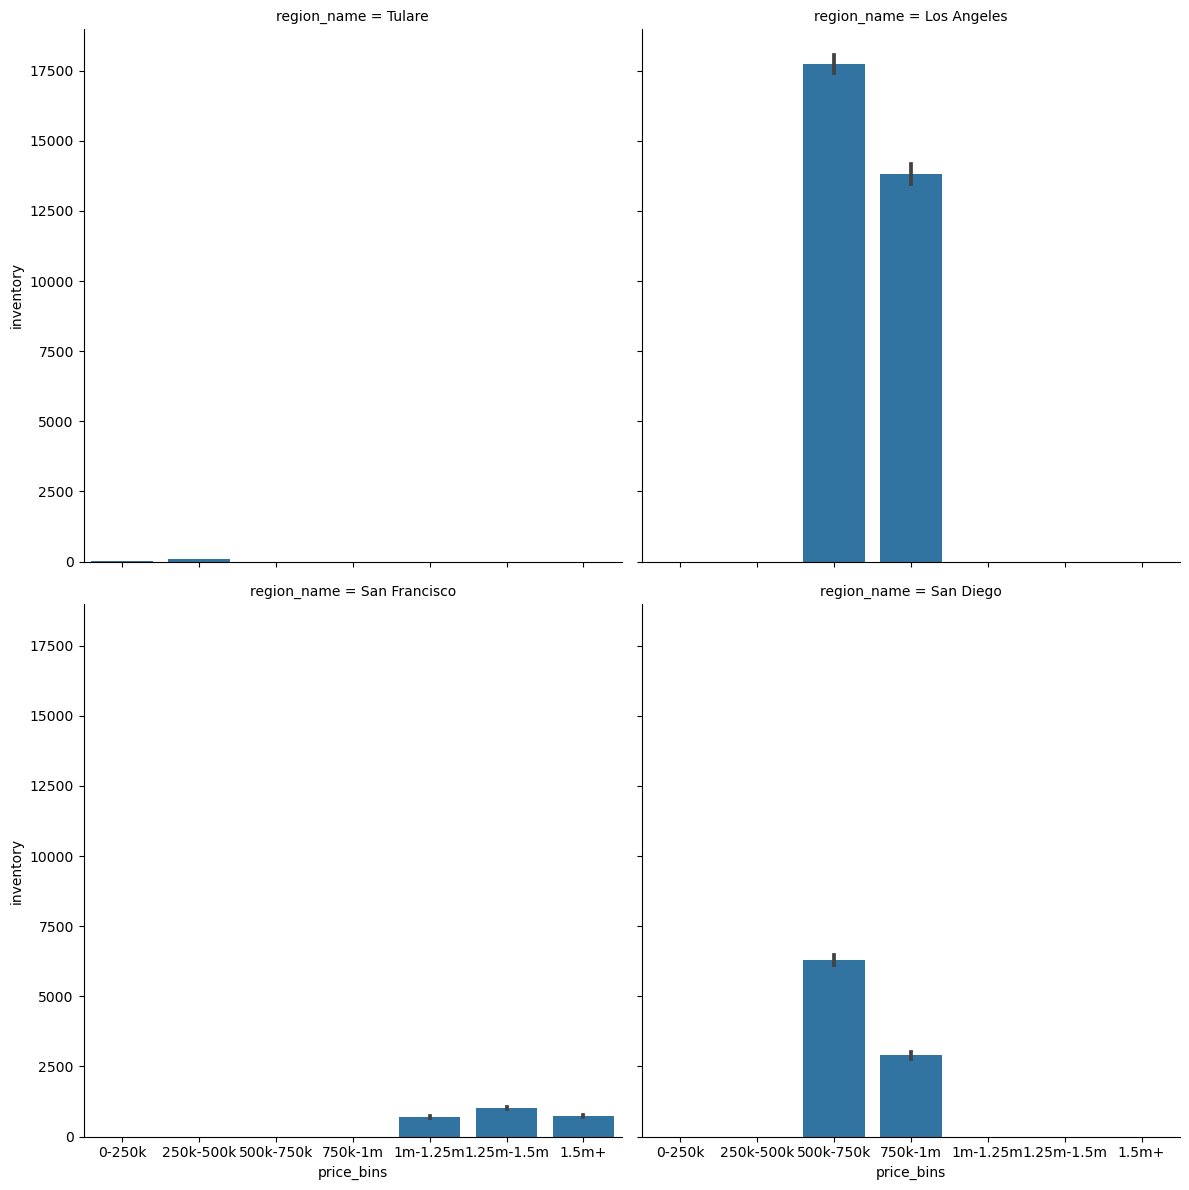

In [18]:
#by changing height,the width also changes(makes it more readable)
g =sns.FacetGrid(ca4,
                col="region_name",
                col_wrap=2,
                height=6
                )

g.map_dataframe(sns.barplot, x="price_bins", y="inventory")